In [ ]:
import pandas as pd                                                        # for data manipulation
import numpy as np                                                         # for numerical operations
from matplotlib import pyplot as plt                                       # for visualization
import seaborn as sns                                                      # for visualization
from sklearn.model_selection import train_test_split                       # for splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler                           # for standardizing the data
from imblearn.over_sampling import SMOTE                                   # for handling class imbalance
from sklearn.linear_model import LogisticRegression                        # for Logistic Regression model
from sklearn.tree import DecisionTreeClassifier                            # for Decision Tree model
from sklearn.ensemble import RandomForestClassifier                        # for Random Forest model
from sklearn.svm import SVC                                                # for Support Vector Machine model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # for evaluating the models
from lightgbm import LGBMClassifier                                        # for LightGBM model
from sklearn.neighbors import KNeighborsClassifier                         # for K-Nearest Neighbors model
from sklearn.naive_bayes import GaussianNB                                 # for Gaussian Naive Bayes model

In [5]:
# Load dataset
file_path = '/content/diabetes copy 2.xlsx'
data = pd.read_excel(file_path)
# Exploratory Data Analysis
print(data.head())
print(data.describe())
print(data.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

**Data Overview:** The dataset comprises 768 entries with 9 columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. Each column represents a specific health metric relevant to diabetes diagnosis. The first five rows of the dataset reveal diverse values across these metrics, providing a snapshot of the range of data.

**Descriptive Statistics** table offers insights into the distribution of each feature.

The mean age is approximately 33 years, with a standard deviation of around 12 years, indicating a relatively young cohort. Glucose levels average about 121 mg/dL, with a standard deviation of 32 mg/dL, showing significant variability. BMI averages around 32, with notable variation (standard deviation of 7.88), highlighting differences in body mass among individuals. Several features, such as SkinThickness and Insulin, have minimum values of 0, suggesting possible missing or zero-filled values which might need further investigation.

**Data Structure and Types:** The dataset's structure is straightforward, with all columns containing non-null values. Seven columns are integers (int64), while two (BMI and DiabetesPedigreeFunction) are floats (float64). The Outcome column is binary, indicating the presence (1) or absence (0) of diabetes. The uniformity in data types and absence of null values simplify preprocessing, although the presence of zeros in some health metrics could warrant special handling to ensure accurate analysis and modeling



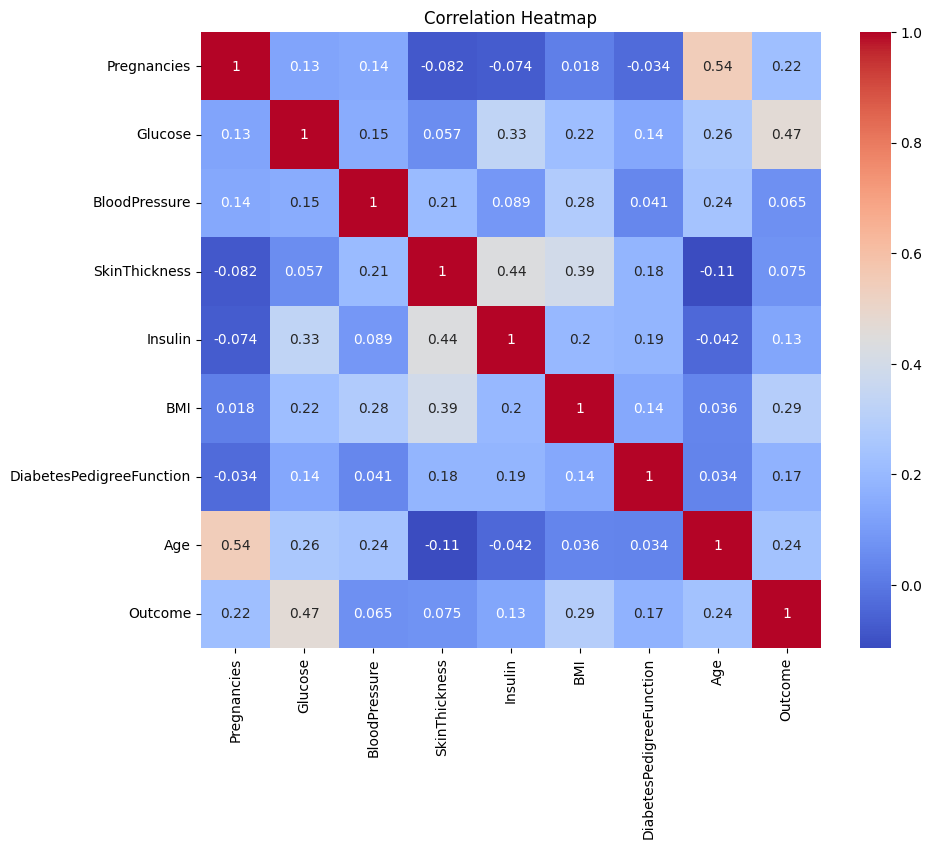

In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap Analysis provides a visual representation of the relationships between different features in the Pima Indians Diabetes dataset. Each cell in the matrix represents the correlation coefficient between the respective row and column features, with values ranging from -1 to 1. A coefficient close to 1 indicates a strong positive correlation, whereas a value close to -1 indicates a strong negative correlation. A value near 0 suggests little to no correlation.

**Key Observations**:
**Pregnancies and Age:** There is a strong positive correlation (0.54) between the number of pregnancies and age. This suggests that older individuals in the dataset tend to have more pregnancies, which is a logical demographic trend.

**Glucose and Outcome:** The correlation between glucose levels and the diabetes outcome is 0.47, indicating a moderately strong positive correlation. Higher glucose levels are associated with an increased likelihood of diabetes.

**BMI and Outcome:** BMI shows a positive correlation of 0.29 with the diabetes outcome, suggesting that higher BMI is associated with a higher risk of diabetes.

**Age and Outcome:** Age has a positive correlation of 0.24 with the outcome, indicating that older individuals have a higher probability of having diabetes.


**Glucose and Insulin:** There is a moderate positive correlation (0.33) between glucose and insulin levels, suggesting that higher glucose levels tend to be accompanied by higher insulin levels. SkinThickness and Insulin: The correlation of 0.44 between skin thickness and insulin indicates a moderate positive relationship.
**BloodPressure and BMI:** A positive correlation (0.28) between blood pressure and BMI suggests that higher BMI is associated with higher blood pressure. Weak Correlations: Features such as Blood Pressure, Skin Thickness, and Diabetes Pedigree Function have weak correlations with the outcome, indicating they may have less direct influence on the prediction of diabetes.

**Negative Correlations:** Some negative correlations are present, such as between Skin Thickness and Age (-0.11), but these are relatively weak and do not indicate strong inverse relationships.

Features with higher correlations to the outcome, like glucose and BMI, are likely to be more informative for predicting diabetes. Conversely, features with low or negative correlations may contribute less to model accuracy and could be considered for exclusion during feature engineering. Understanding these relationships helps in constructing more accurate and efficient predictive models.

Outcome
0    500
1    268
Name: count, dtype: int64


<ipython-input-7-33f8967695a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


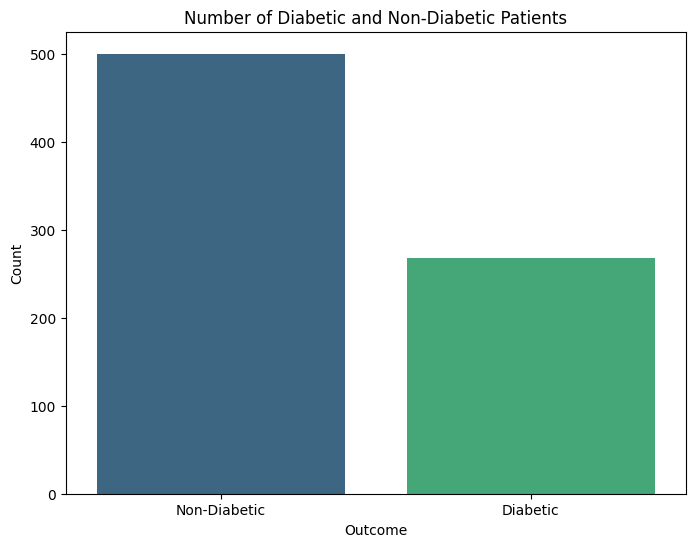

In [7]:
# Identify the number of diabetic and non-diabetic patients
outcome_counts = data['Outcome'].value_counts()
print(outcome_counts)

# Plot a bar graph for the number of diabetic and non-diabetic patients
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

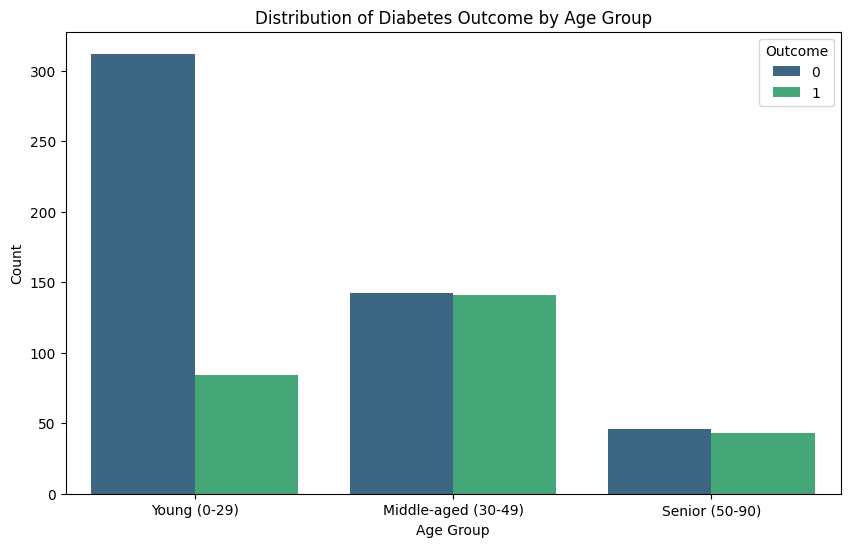

In [8]:
# Define age groups
bins = [0, 30, 50, np.inf]
labels = ['Young (0-29)', 'Middle-aged (30-49)', 'Senior (50-90)']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Plot a bar graph for AgeGroup by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Outcome', data=data, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome by Age Group')
plt.show()

In [9]:
# Remove the 'AgeGroup' column
data = data.drop(columns=['AgeGroup'])

<ipython-input-12-19d25f343b7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette='viridis')


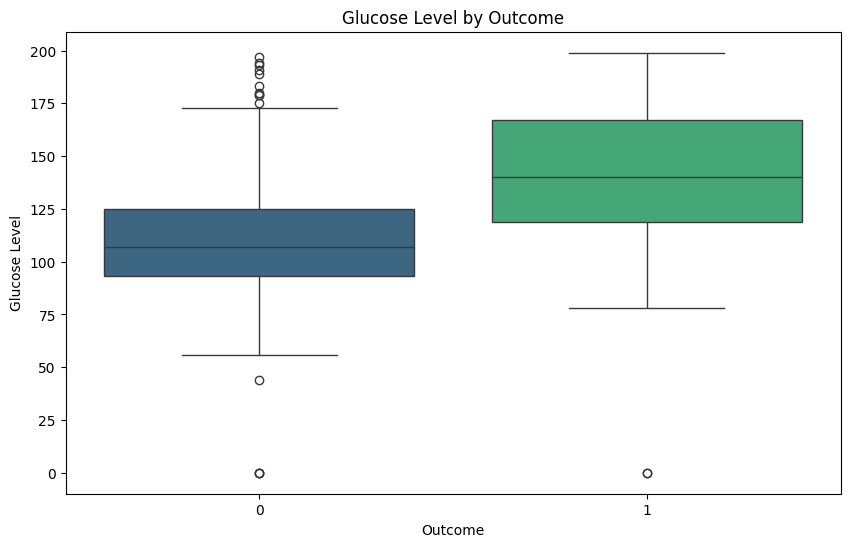

<ipython-input-12-19d25f343b7b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=data, palette='viridis')


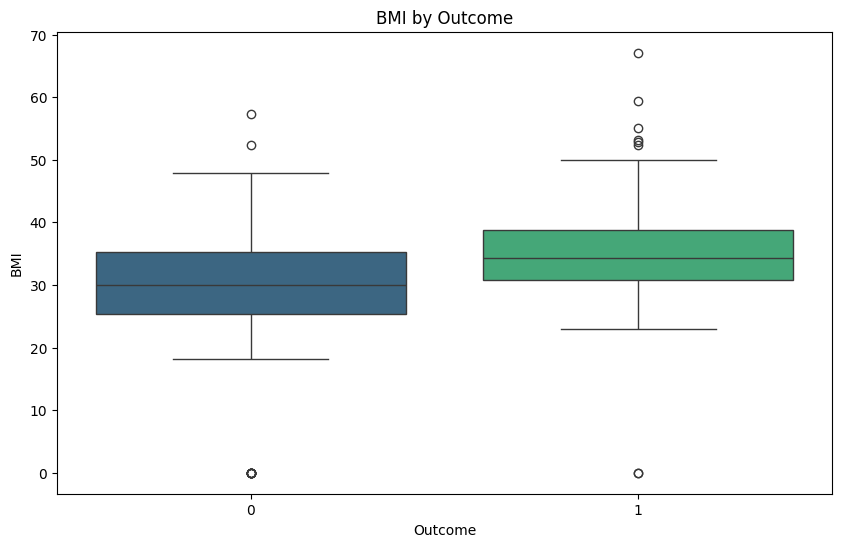

<ipython-input-12-19d25f343b7b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BloodPressure', data=data, palette='viridis')


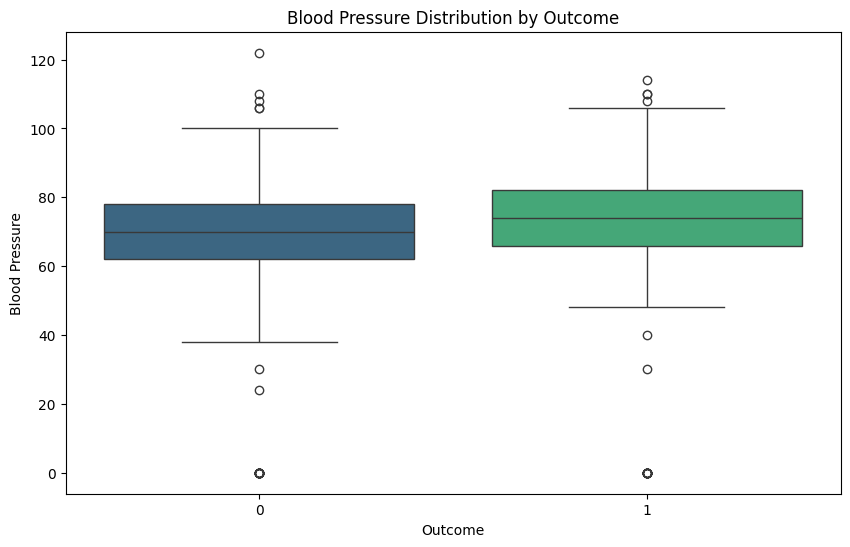

<ipython-input-12-19d25f343b7b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=data, palette='viridis')


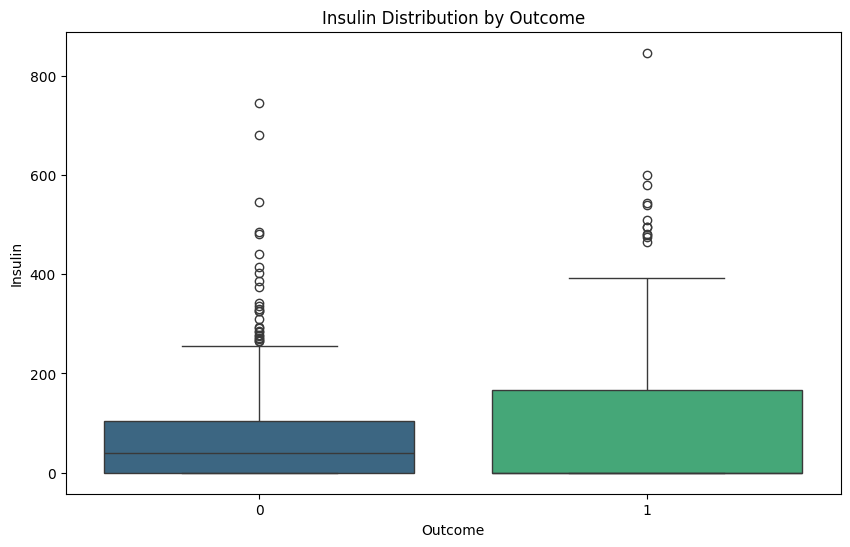

In [12]:
# Visualization of variables
# Glucose and Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.title('Glucose Level by Outcome')
plt.show()

# BMI and Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('BMI by Outcome')
plt.show()

# Relationship between Blood Pressure and Outcome using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

# Relationship between Insulin and Outcome using a violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.title('Insulin Distribution by Outcome')
plt.show()

In [14]:
# Columns to check for zeros
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check for zeros in the specified columns and count them
for column in columns_to_check:
    zero_count = (data[column] == 0).sum()
    print(f"Zeros in {column}: {zero_count}")


Zeros in Glucose: 5
Zeros in BloodPressure: 35
Zeros in SkinThickness: 227
Zeros in Insulin: 374
Zeros in BMI: 11


In [19]:
# Columns with zeros that you want to replace
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the median of the non-zero values in each column
for column in columns_with_zeros:
    # Calculate the median of non-zero values for the current column
    median = data[column][data[column] != 0].median()

    # Replace zero values with the calculated median
    data[column] = data[column].replace(0, median)

# Checking if the zeros have been replaced
for column in columns_with_zeros:
    zero_count = (data[column] == 0).sum()
    print(f"Zeros remaining in {column} after imputation: {zero_count}")


Zeros remaining in Glucose after imputation: 0
Zeros remaining in BloodPressure after imputation: 0
Zeros remaining in SkinThickness after imputation: 0
Zeros remaining in Insulin after imputation: 0
Zeros remaining in BMI after imputation: 0


In [23]:
# Define a function to identify outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List to store columns with outliers
columns_with_outliers = []

# Check each column for outliers
for column in columns_with_zeros:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Outliers detected in {column}:")
        print(outliers[[column]])
        print()  # Blank line for better readability
        columns_with_outliers.append(column)

if not columns_with_outliers:
    print("No outliers detected.")
else:
    print(f"Columns with outliers: {columns_with_outliers}")


Outliers detected in BloodPressure:
     BloodPressure
18              30
43             110
84             108
106            122
125             30
177            110
362            108
549            110
597             24
599             38
658            106
662            106
672            106
691            114

Outliers detected in SkinThickness:
     SkinThickness
8               45
16              47
32              11
39              47
50              11
..             ...
698             11
710             13
718             46
753             44
763             48

[87 rows x 1 columns]

Outliers detected in Insulin:
     Insulin
3         94
4        168
6         88
8        543
13       846
..       ...
753      510
755      110
760       16
763      180
765      112

[346 rows x 1 columns]

Outliers detected in BMI:
      BMI
120  53.2
125  55.0
177  67.1
193  52.3
247  52.3
303  52.9
445  59.4
673  57.3

Columns with outliers: ['BloodPressure', 'SkinThickness', 'Ins

In [24]:
# Set the lower and upper percentile thresholds for outlier removal
lower_percentile = 1
upper_percentile = 99

# Create a copy of the dataset to avoid modifying the original data
cleaned_data = data.copy()

# Columns with outliers
columns_with_outliers = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remove outliers from the dataset
for column in columns_with_outliers:
    lower_bound = cleaned_data[column].quantile(lower_percentile / 100)
    upper_bound = cleaned_data[column].quantile(upper_percentile / 100)
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

# The cleaned_data DataFrame now has outliers removed
print("\nCleaned data shape:", cleaned_data.shape)
print("\nCleaned Data:\n", cleaned_data)



Cleaned data shape: (713, 9)

Cleaned Data:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      125  33.6   
1              1       85             66             29      125  26.6   
2              8      183             64             29      125  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74             29      125  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27      125  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             29      125  30.1   
767            1       93             70             31      125  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                  

In [25]:
# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']


# Standardization
scaler = StandardScaler()                                                  # initializing the standard scaler
X_scaled = scaler.fit_transform(X)                                         # scaling the features

# Handling class imbalance using SMOTE
smote = SMOTE()                                                            # initializing SMOTE
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)                 # applying SMOTE to balance the classes

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  # splitting the data

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        99
           1       0.71      0.71      0.71       101

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

Confusion Matrix for Logistic Regression:
 [[70 29]
 [29 72]]


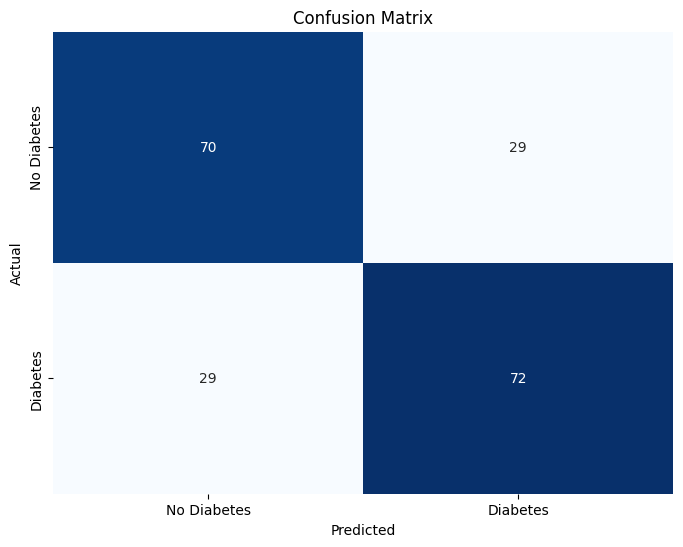

In [35]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression (solver='liblinear') # You can change the solver if needed

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Model Name
model_name = "Logistic Regression"

# Evaluation: Classification Report
print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

# Evaluation: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for {model_name}:\n", conf_matrix)


# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        99
           1       0.74      0.74      0.74       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Confusion Matrix for Decision Tree:
 [[73 26]
 [26 75]]


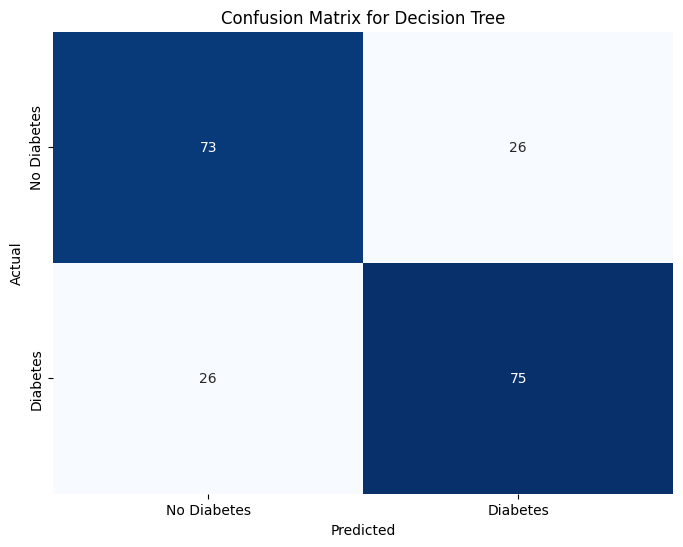

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
dt_y_pred = decision_tree_model.predict(X_test)

# Model Name
dt_model_name = "Decision Tree"

# Evaluation: Classification Report
print(f"Classification Report for {dt_model_name}:\n", classification_report(y_test, dt_y_pred))

# Evaluation: Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
print(f"Confusion Matrix for {dt_model_name}:\n", dt_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.77      0.84      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Confusion Matrix for Random Forest:
 [[73 26]
 [16 85]]


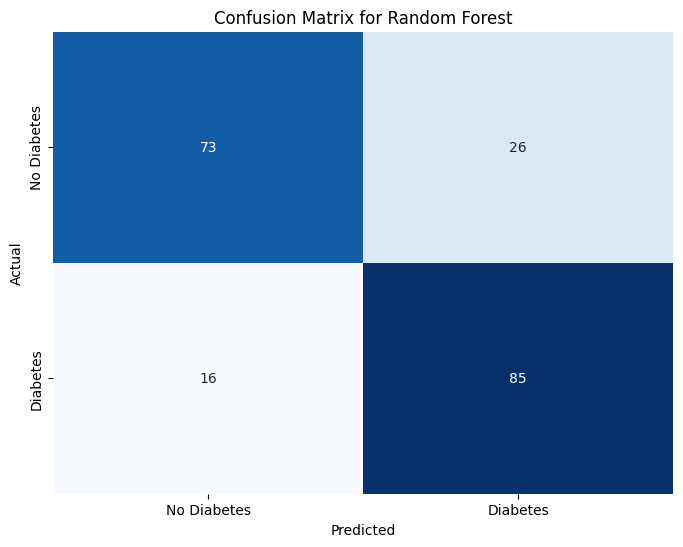

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = random_forest_model.predict(X_test)

# Model Name
rf_model_name = "Random Forest"

# Evaluation: Classification Report
print(f"Classification Report for {rf_model_name}:\n", classification_report(y_test, rf_y_pred))

# Evaluation: Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print(f"Confusion Matrix for {rf_model_name}:\n", rf_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        99
           1       0.75      0.69      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Confusion Matrix for Naive Bayes:
 [[76 23]
 [31 70]]


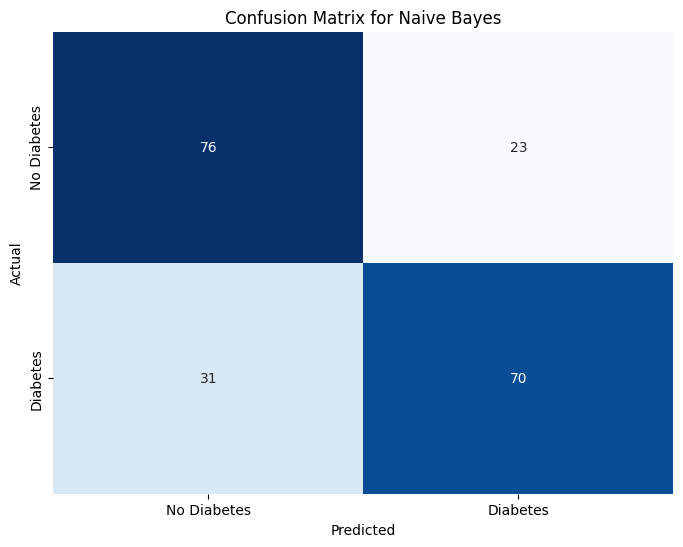

In [39]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
nb_y_pred = naive_bayes_model.predict(X_test)

# Model Name
nb_model_name = "Naive Bayes"

# Evaluation: Classification Report
print(f"Classification Report for {nb_model_name}:\n", classification_report(y_test, nb_y_pred))

# Evaluation: Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
print(f"Confusion Matrix for {nb_model_name}:\n", nb_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74        99
           1       0.72      0.89      0.80       101

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.77       200
weighted avg       0.79      0.77      0.77       200

Confusion Matrix for K-Nearest Neighbors:
 [[64 35]
 [11 90]]


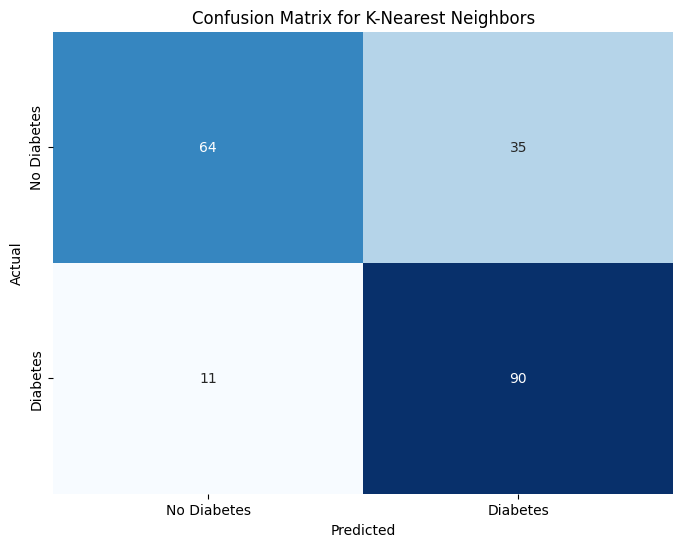

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_y_pred = knn_model.predict(X_test)

# Model Name
knn_model_name = "K-Nearest Neighbors"

# Evaluation: Classification Report
print(f"Classification Report for {knn_model_name}:\n", classification_report(y_test, knn_y_pred))

# Evaluation: Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print(f"Confusion Matrix for {knn_model_name}:\n", knn_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.79      0.71      0.74        99
           1       0.74      0.81      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

Confusion Matrix for Support Vector Machine:
 [[70 29]
 [19 82]]


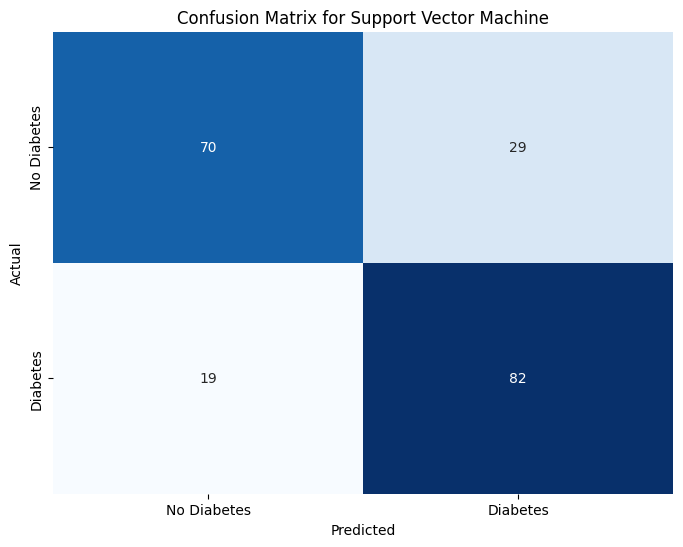

In [41]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_y_pred = svm_model.predict(X_test)

# Model Name
svm_model_name = "Support Vector Machine"

# Evaluation: Classification Report
print(f"Classification Report for {svm_model_name}:\n", classification_report(y_test, svm_y_pred))

# Evaluation: Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
print(f"Confusion Matrix for {svm_model_name}:\n", svm_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()


[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1135
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

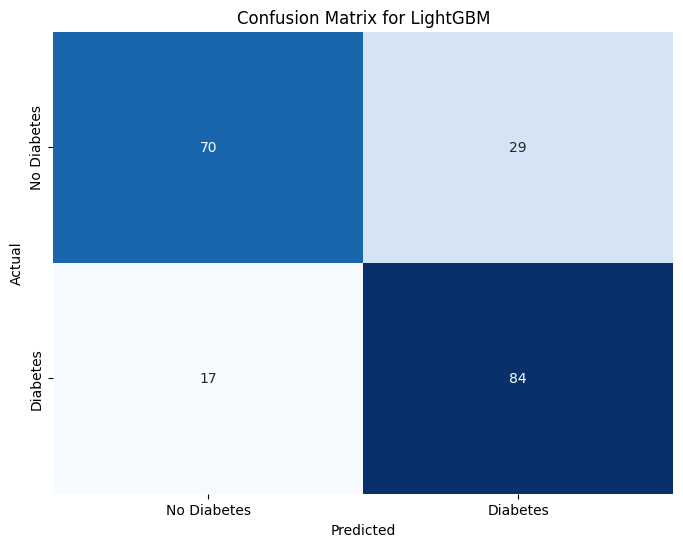

In [42]:
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
lgb_y_pred = lgb_model.predict(X_test)

# Model Name
lgb_model_name = "LightGBM"

# Evaluation: Classification Report
print(f"Classification Report for {lgb_model_name}:\n", classification_report(y_test, lgb_y_pred))

# Evaluation: Confusion Matrix
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
print(f"Confusion Matrix for {lgb_model_name}:\n", lgb_conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LightGBM')
plt.show()


Best Model: Random Forest with Accuracy: 0.79


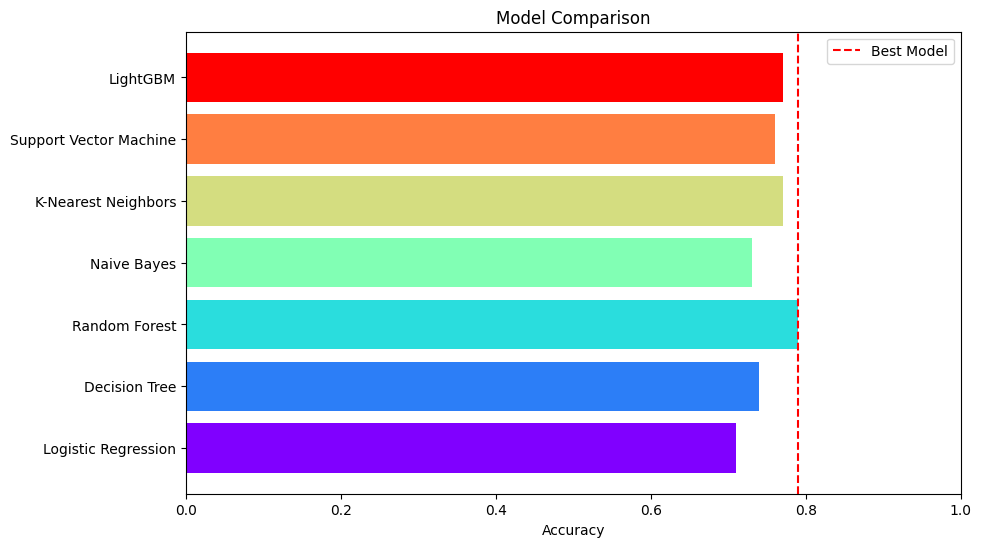

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding accuracies
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Support Vector Machine",
    "LightGBM"
]

# Example accuracies (replace with your actual results)
accuracies = [
    0.71,  # Logistic Regression
    0.74,  # Decision Tree (you need to provide the actual accuracy)
    0.79,  # Random Forest
    0.73,  # Naive Bayes
    0.77,  # K-Nearest Neighbors
    0.76,  # Support Vector Machine
    0.77   # LightGBM
]

# Determine the best model
best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]
best_model_accuracy = accuracies[best_model_index]

# Print best model
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")

# Create a bar plot for model comparison
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_names)))  # Generate rainbow colors

plt.barh(model_names, accuracies, color=colors)  # Apply the rainbow colors
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.axvline(x=best_model_accuracy, color='red', linestyle='--', label='Best Model')
plt.legend()
plt.show()


In [59]:
import pickle

# Our best model Random Forest model and it is stored in the variable `rf`
# Train Random Forest model (example)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the Random Forest model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

# Print confirmation
print("Random Forest model trained and saved successfully!")

Random Forest model trained and saved successfully!
